In [1]:
#load packages
import numpy as np
from netCDF4 import Dataset
import pickle as pickle
import scipy.stats as stats
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
%matplotlib inline
mpl.rc('font',size=16) #set default font size and weight for plots

In [2]:
#unpickle El Nino central dates
with open('PSL_composite_ElNino.pickle','rb') as fp:
    ElNinovar_composite,ElNinovar_series,p12,lon2,lat2 = pickle.load(fp,encoding='latin1')
    
#unpickle El Nino central dates
with open('PSL_composite_LaNina.pickle','rb') as fp:
    LaNinavar_composite,LaNinavar_series,p22,lon2,lat2 = pickle.load(fp,encoding='latin1')

In [3]:
LaNinavar_composite.shape

(192, 288)

In [3]:
#add cyclic points manually 
ElNinovar_cyclic = np.zeros((len(lat2),len(lon2)+1),np.float)
ElNinovar_cyclic[:,0:len(lon2)]= ElNinovar_composite[:,:]
ElNinovar_cyclic[:,len(lon2)] = ElNinovar_composite[:,len(lon2)-1]

LaNinavar_cyclic = np.zeros((len(lat2),len(lon2)+1),np.float)
LaNinavar_cyclic[:,0:len(lon2)]= LaNinavar_composite[:,:]
LaNinavar_cyclic[:,len(lon2)] = LaNinavar_composite[:,len(lon2)-1]

p12_cyclic = np.ma.zeros((len(lat2),len(lon2)+1),np.float)
p12_cyclic[:,0:len(lon2)]= p12[:,:]
p12_cyclic[:,len(lon2)] = p12[:,len(lon2)-1]

p22_cyclic = np.ma.zeros((len(lat2),len(lon2)+1),np.float)
p22_cyclic[:,0:len(lon2)]= p22[:,:]
p22_cyclic[:,len(lon2)] = p22[:,len(lon2)-1]

lons = np.zeros([1,lon2.size+1])
lons[0,0:lon2.size] = lon2[:]
lons[0,lon2.size] = 360

In [4]:
lon_new = lons
xx, yy = np.meshgrid(lon_new, lat2)
m = Basemap(projection='npstere', lat_0=90, lon_0=0, boundinglat=20, resolution='c',round=True)
xslp, yslp = m(xx, yy) #converts rectangular meshgrid into meshgrid for the specific projection

In [5]:
#unpickle ENSO composites
with open('TAU_THF_ATL_JFM_composite_ElNino.pickle','rb') as fp:
    uor1,vor1,xor,yor,thfa_sig_elnino,x,y = pickle.load(fp)

with open('TAU_THF_ATL_JFM_composite_LaNina.pickle','rb') as fp:
    uor2,vor2,xor,yor,thfa_sig_lanina,x,y = pickle.load(fp)

In [6]:
mm = Basemap(projection='cyl', lon_0 = -45, llcrnrlon=270, llcrnrlat=0, urcrnrlon=360, urcrnrlat=80)

In [7]:
#unpickle El Nino central dates
with open('HMXL_composite_ElNino.pickle','rb') as fp:
    HMXL_ElNinovar_composite,HMXL_ElNinovar_series,p11,lon1,lat1 = pickle.load(fp)
    
#unpickle El Nino central dates
with open('HMXL_composite_LaNina.pickle','rb') as fp:
    HMXL_LaNinavar_composite,HMXL_LaNinavar_series,p21,lon1,lat1 = pickle.load(fp)

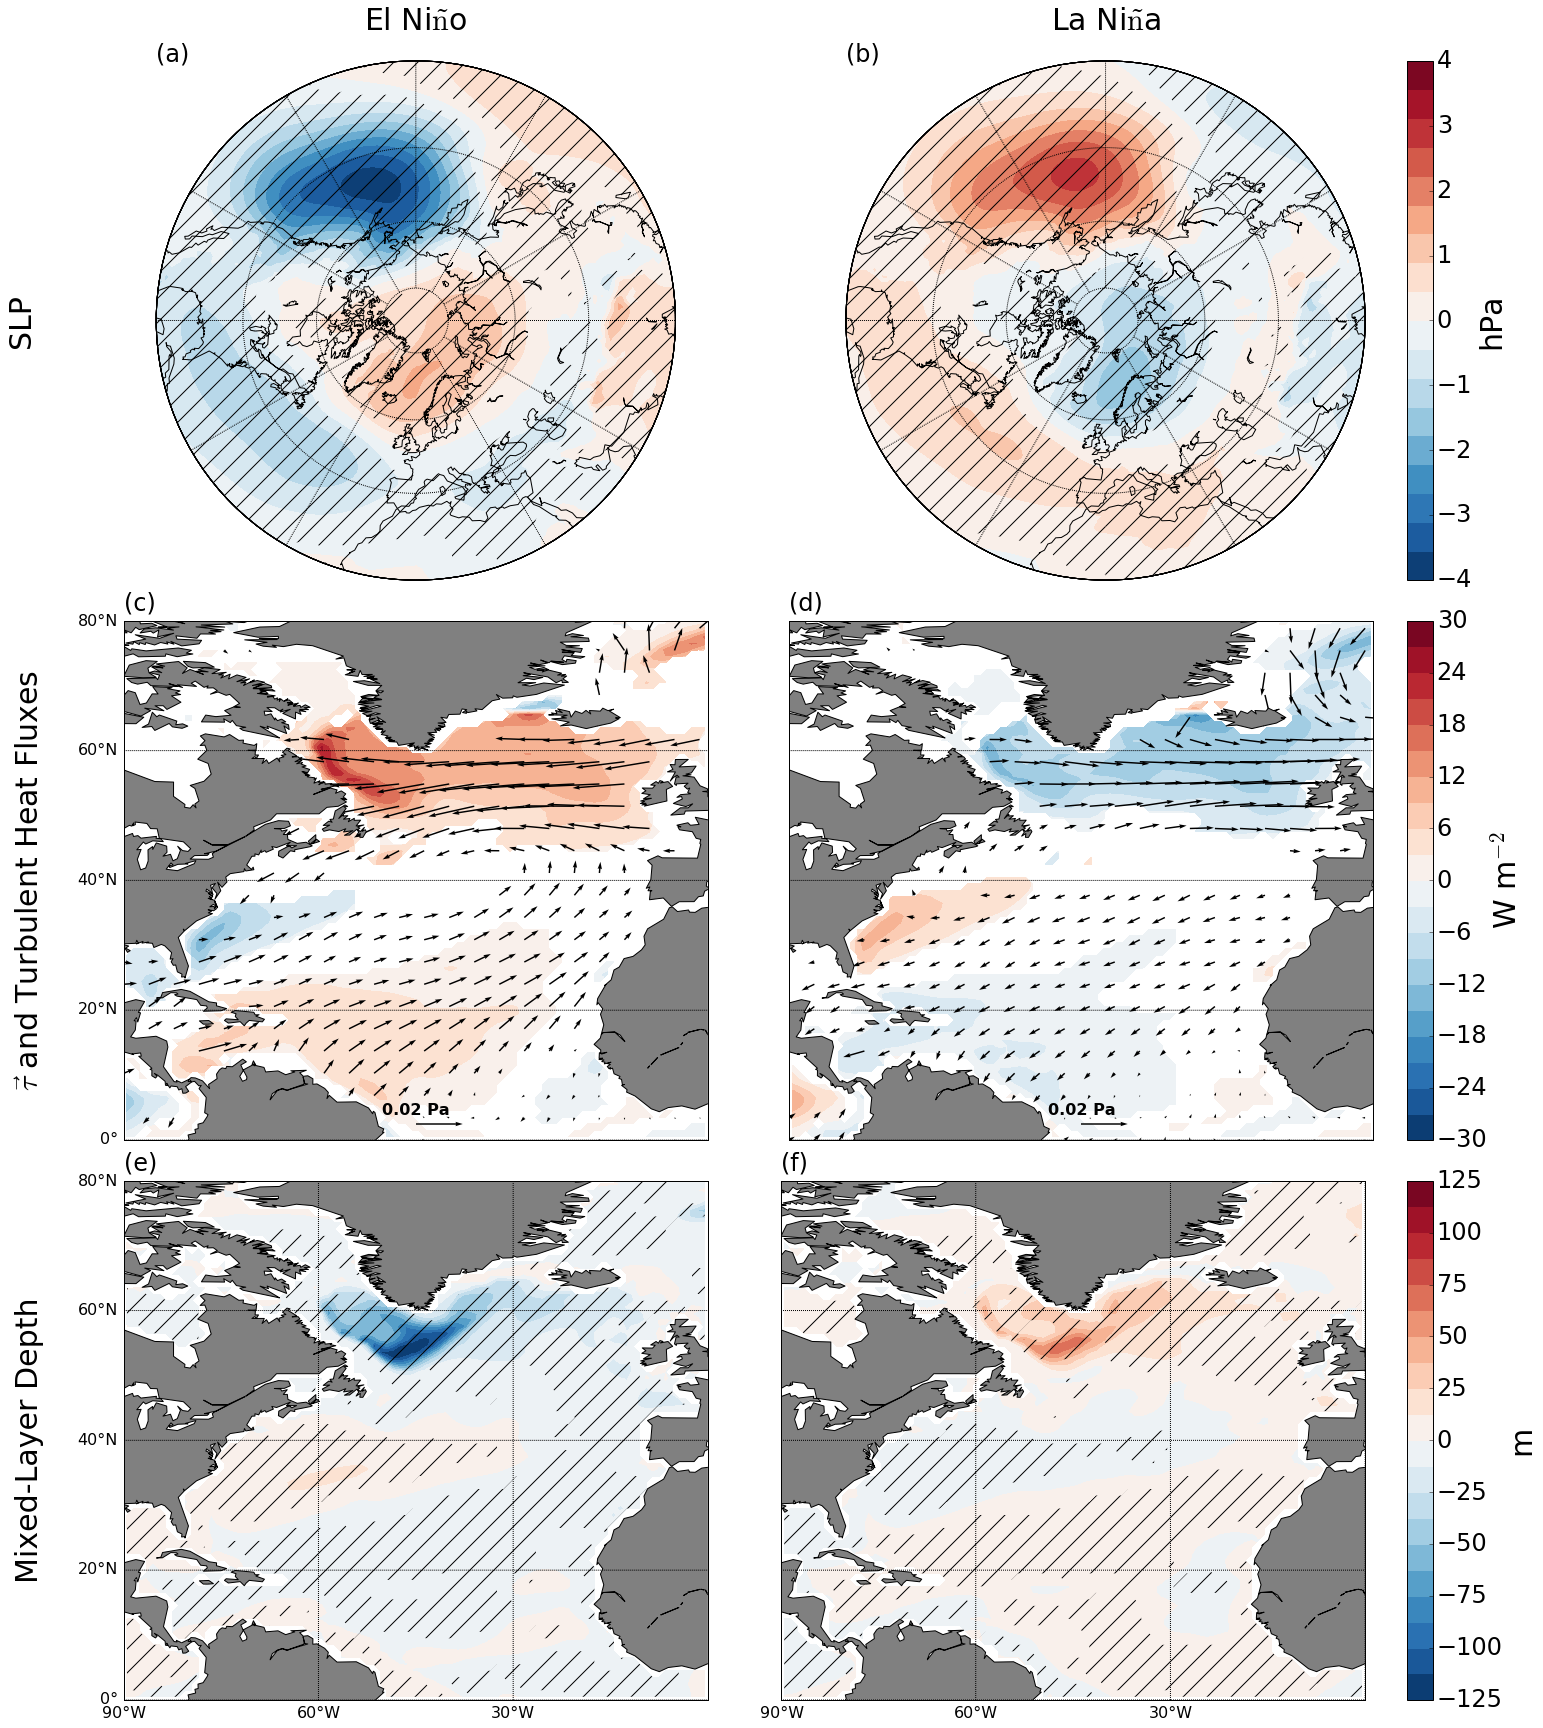

In [8]:
#plot in stereographic projetion
fig = plt.figure(figsize=(22,24))
v = np.linspace(-30,30,21)
v2 = np.linspace(-30,30,11)


vslp = np.linspace(-4,4,19)
vslp2 = np.linspace(-4,4,9)

ax1 = fig.add_subplot(3,2,1)
m.drawcoastlines()
m.drawmapboundary(fill_color='none')
pc1 = m.contourf(xslp,yslp, ElNinovar_cyclic/100, vslp,cmap='RdBu_r')
#pc1.set_clim(-4,4)
pc2 = m.contourf(xslp,yslp,p12_cyclic,colors = 'none', hatches=['/'])
m.drawparallels(range(0,90,20), labels=[1,1,0,0])
m.drawmeridians(range(30,360,30), labels=[0,0,0,0])
plt.title(r'El Ni$\~{\rm n}$o', y=1.05,fontsize=30)
plt.ylabel('SLP',labelpad=120,fontsize=30)
plt.text(0, 1,'(a)',transform=ax1.transAxes,fontsize=24)
plt.tight_layout()

#add colorbar
#cbar = fig.colorbar(pc1)
#cbar.set_label('Pa', fontsize=14,weight='bold') #$^\circ$ C
#cbar.set_ticks(v,update_ticks=True)

ax2 = fig.add_subplot(3,2,2)
m.drawcoastlines()
m.drawmapboundary(fill_color='none')
pc1 = m.contourf(xslp,yslp, LaNinavar_cyclic/100, vslp,cmap='RdBu_r')
#pc2.set_clim(-4,4)
pc2 = m.contourf(xslp,yslp,p22_cyclic,colors = 'none', hatches=['/'])
m.drawparallels(range(0,90,20), labels=[1,1,0,0])
m.drawmeridians(range(30,360,30), labels=[0,0,0,0])
plt.title(r'La Ni$\~{\rm n}$a', y=1.05,fontsize=30)
plt.text(0, 1,'(b)',transform=ax2.transAxes,fontsize=24)
plt.tight_layout()

#add colorbar
cbar = fig.colorbar(pc1)
cbar.set_label('hPa', fontsize=30) #$^\circ$ C
cbar.set_ticks(vslp2,update_ticks=True)
cbar.ax.tick_params(labelsize=24)

ax1 = fig.add_subplot(3,2,3)
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
pc1 = mm.contourf(x,y, thfa_sig_elnino, v, cmap='RdBu_r')
#pc1.set_clim(-80,80)
pc2 = mm.quiver(xor[::3,::3],yor[::3,::3],uor1[::3,::3],vor1[::3,::3],scale=0.25)
qk = plt.quiverkey(pc2, 0.5, 0.03, 0.02, r'0.02 Pa',
                   fontproperties={'weight': 'bold'})
#pc2 = mm.scatter(x,y, p1,c='gray')
mm.fillcontinents(color='gray')
mm.drawparallels(range(0,90,20), labels=[1,0,0,0])
#mm.drawmeridians(range(0,360,30), labels=[0,0,0,1])
#plt.title('(a) El Nino', y=1.03, weight='bold')
plt.ylabel(r'${\vec{\tau}}$ and Turbulent Heat Fluxes',labelpad=80,fontsize=30)
plt.text(0, 1.02,'(c)',transform=ax1.transAxes,fontsize=24)

plt.tight_layout()

ax1 = fig.add_subplot(3,2,4)
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
pc1 = mm.contourf(x,y, thfa_sig_lanina, v, cmap='RdBu_r')
#pc1.set_clim(-80,80)
pc2 = mm.quiver(xor[::3,::3],yor[::3,::3],uor2[::3,::3],vor2[::3,::3],scale=0.25)
qk = plt.quiverkey(pc2, 0.5, 0.03, 0.02, r'0.02 Pa',
                   fontproperties={'weight': 'bold'})
#pc2 = mm.scatter(x,y, p1,c='gray')
mm.fillcontinents(color='gray')
mm.drawparallels(range(0,90,20), labels=[0,0,0,0])
#mm.drawmeridians(range(0,360,30), labels=[0,0,0,1])
plt.text(0, 1.02,'(d)',transform=ax1.transAxes,fontsize=24)
#plt.title('(b) La Nina', y=1.03, weight='bold')

plt.tight_layout()

#add colorbar
cbar = fig.colorbar(pc1,pad=0.04)
cbar.set_label('W m$^{-2}$', fontsize=30) #SST: $^\circ$ C
cbar.set_ticks(v2,update_ticks=True)
cbar.ax.tick_params(labelsize=24)

v = np.linspace(-125,125,21)
v2 = np.linspace(-125,125,11)

ax1 = fig.add_subplot(3,2,5)
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
pc1 = mm.contourf(x,y, HMXL_ElNinovar_composite/100.0, v,cmap='RdBu_r')
#pc1.set_clim(-90,90)
pc2 = mm.contourf(x,y,p11,colors = 'none', hatches=['/'])
mm.fillcontinents(color='gray')
mm.drawparallels(range(0,90,20), labels=[1,0,0,0])
mm.drawmeridians(range(30,360,30), labels=[0,0,0,1])
#plt.title('(a) El Nino', x=1.03, weight='bold')
plt.ylabel('Mixed-Layer Depth',labelpad=80,fontsize=30)
plt.text(0, 1.02,'(e)',transform=ax1.transAxes,fontsize=24)

plt.tight_layout()

#add colorbar
#cbar = fig.colorbar(pc1)
#cbar.set_label('Pa', fontsize=14,weight='bold') #$^\circ$ C
#cbar.set_ticks(v,update_ticks=True)

ax2 = fig.add_subplot(3,2,6)
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
pc2 = mm.contourf(x,y, HMXL_LaNinavar_composite/100.0, v,cmap='RdBu_r')
#pc2.set_clim(-90,90)
pc2 = mm.contourf(x,y,p21,hatches=['/'],colors='none')
mm.fillcontinents(color='gray')
mm.drawparallels(range(0,90,20), labels=[0,0,0,0])
mm.drawmeridians(range(0,360,30), labels=[0,0,0,1])
plt.text(0, 1.02,'(f)',transform=ax2.transAxes,fontsize=24)
#plt.title('(b) La Nina', y=1.03, weight='bold')

plt.tight_layout()

#add colorbar
cbar = fig.colorbar(pc1)
cbar.set_label('m', fontsize=30) #$^\circ$ C
cbar.set_ticks(v2,update_ticks=True)
cbar.ax.tick_params(labelsize=24)

#save figure
plt.savefig('Figure1.png',bbox_inches='tight')